# Saldaña Stiven

# Ejercicio 4: Modelo Probabilístico
# Objetivo de la práctica
* Comprender los componentes del modelo vectorial mediante cálculos manuales y observación directa.
* Aplicar el modelo de espacio vectorial con TF-IDF para recuperar documentos relevantes.
* Comparar la recuperación con BM25 frente a TF-IDF.
* Analizar visualmente las diferencias entre los modelos.
* Evaluar si los rankings generados son consistentes con lo que considerarías   documentos relevantes.


In [137]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/20-newsgroups/misc.forsale.txt
/kaggle/input/20-newsgroups/rec.autos.txt
/kaggle/input/20-newsgroups/list.csv
/kaggle/input/20-newsgroups/comp.os.ms-windows.misc.txt
/kaggle/input/20-newsgroups/sci.electronics.txt
/kaggle/input/20-newsgroups/comp.sys.mac.hardware.txt
/kaggle/input/20-newsgroups/talk.politics.mideast.txt
/kaggle/input/20-newsgroups/talk.politics.guns.txt
/kaggle/input/20-newsgroups/talk.religion.misc.txt
/kaggle/input/20-newsgroups/comp.graphics.txt
/kaggle/input/20-newsgroups/soc.religion.christian.txt
/kaggle/input/20-newsgroups/rec.sport.hockey.txt
/kaggle/input/20-newsgroups/rec.sport.baseball.txt
/kaggle/input/20-newsgroups/comp.windows.x.txt
/kaggle/input/20-newsgroups/comp.sys.ibm.pc.hardware.txt
/kaggle/input/20-newsgroups/rec.motorcycles.txt
/kaggle/input/20-newsgroups/sci.med.txt
/kaggle/input/20-newsgroups/sci.space.txt
/kaggle/input/20-newsgroups/alt.atheism.txt
/kaggle/input/20-newsgroups/sci.crypt.txt
/kaggle/input/20-newsgroups/talk.politics

# Parte 0: Carga del Corpus

In [138]:
from sklearn.datasets import fetch_20newsgroups
import os
from os.path import basename

In [152]:
import os

ruta = "/kaggle/input/20-newsgroups"
corpus = []
labels = []

if os.path.exists(ruta):
    for filename in os.listdir(ruta):
        if filename.endswith(".txt"):
            archivo_path = os.path.join(ruta, filename)
            try:
                with open(archivo_path, "r", encoding="utf-8", errors="ignore") as f:
                    texto = f.read()
                    corpus.append(texto)
                    labels.append(os.path.splitext(filename)[0])
            except Exception as e:
                print(f"Error al leer {archivo_path}: {e}")
    print("Cargado correctamente")


Cargado correctamente


In [153]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [154]:
def preprocess_text(doc):
    # aqui se normaliza y se quitan los signos 
    doc = re.sub(pattern=r'[^\w\s]', repl='', string=doc.lower())
    
    # aqui se tokeniza
    tokens = word_tokenize(doc)
    
    # aqui se aplicar Stemming
    processed_tokens = []
    for token in tokens:
        if token not in stop_words and len(token) > 3: 
            stemmed_token = stemmer.stem(token)
            processed_tokens.append(stemmed_token)   
    return " ".join(processed_tokens)

In [155]:
print(corpus[0][:120])

Newsgroup: misc.forsale
document_id: 70337
From: kedz@bigwpi.WPI.EDU (John Kedziora)
Subject: Motorcycle wanted.

Sender


In [156]:
print(processed_corpus[0][:100])

newsgroup miscforsal document_id 70337 kedzbigwpiwpiedu john kedziora subject motorcycl want sender 


# Parte 1: Cálculo de TF, DF, IDF y TF-IDF
## Actividad
1. Utiliza el corpus cargado.
2. Construye la matriz de términos (TF), y calcula la frecuencia de documentos (DF)
3. Calcula TF-IDF utilizando sklearn.
4. Visualiza los valores en un DataFrame para analizar las diferencias entre los términos.


 Matriz TF 


,00,000,0000,00000,000000,00000000,0000000004,0000000005,00000000b,00000001,...,zzt,zztop,zzvsi,zzx,zzy_3w,zzz,zzzoh,zzzz,zzzzzz,zzzzzzt
0,2414,170,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,52,256,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,120,26,2,0,0,0,0,0,0,0,...,2,0,2,0,2,0,2,0,0,0
3,50,52,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,44,30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 Cálculo de DF 


,Término,DF
0,00,20
59296,bigger,20
58515,bell,20
138441,planning,20
58628,benefit,20
138412,plan,20
138398,plain,20
138381,places,20
138375,placed,20
138372,place,20



 Matriz TF-IDF


,00,000,0000,00000,000000,00000000,0000000004,0000000005,00000000b,00000001,...,zzt,zztop,zzvsi,zzx,zzy_3w,zzz,zzzoh,zzzz,zzzzzz,zzzzzzt
0,0.267350,0.018827,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1,0.004803,0.023643,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
2,0.000548,0.000119,0.000017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000031,0.0,0.000031,0.0,0.000031,0.0,0.000031,0.0,0.0,0.0
3,0.005823,0.006056,0.000430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
4,0.004392,0.002995,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


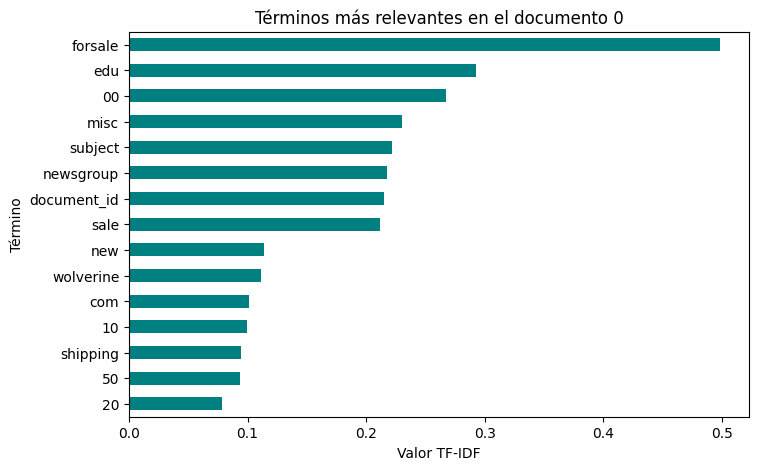

In [157]:
import os
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt

# Matriz TF
X_tf = vectorizer.fit_transform(corpus)
tf_df = pd.DataFrame(X_tf.toarray(), columns=vectorizer.get_feature_names_out())
print("\n Matriz TF ")
display(tf_df.head())

# Aqui se calcula el DF 
df = (X_tf > 0).sum(axis=0).A1
df_df = pd.DataFrame({'Término': vectorizer.get_feature_names_out(),'DF': df})
print(" Cálculo de DF ")
display(df_df.sort_values('DF', ascending=False).head(10))

# Aqui se cálcula TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(corpus)
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print("\n Matriz TF-IDF")
display(tfidf_df.head())

# Visualizacion de los datos para comparacion 
doc_idx = 0
top_terms = tfidf_df.iloc[doc_idx].sort_values(ascending=False).head(15)

plt.figure(figsize=(8,5))
top_terms.sort_values().plot(kind='barh', color='teal')
plt.title(f"Términos más relevantes en el documento {doc_idx}")
plt.xlabel("Valor TF-IDF")
plt.ylabel("Término")
plt.show()
